# Import

In [0]:
import numpy as np 
import pandas as pd 
import numpy as np
import scipy.io
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

# Importing the dataset

In [0]:
from google.colab import drive
drive.mount('/content/drive')

import scipy.io
mat = scipy.io.loadmat('/content/drive/My Drive/Colab Notebooks/Machine Learning For Data Mining/EEG Data/S1.mat')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preprocessing

In [0]:
print(len(mat))
print(mat)

11
{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Aug 22 19:12:25 2017', '__version__': '1.0', '__globals__': [], 'sub': array(['S1'], dtype='<U2'), 'Fs': array([[62.5]]), 'N': array([[32]], dtype=uint8), 'T': array([[5188]], dtype=uint16), 'exemplarLabels': array([[40, 64, 29, ..., 59,  3, 12]], dtype=uint8), 'categoryLabels': array([[4, 6, 3, ..., 5, 1, 1]], dtype=uint8), 'X_2D': array([[-0.26424164, -0.47586018, -0.47061757, ...,  0.05198565,
         0.08307296, -0.04543913],
       [ 0.0028675 , -0.04133774,  0.05108967, ...,  0.09525956,
        -0.00872008,  0.12494965],
       [-0.22358645,  0.02478356,  0.08543183, ...,  0.0938575 ,
         0.06906053,  0.09690079],
       ...,
       [ 0.17795506, -0.06740315,  0.09080031, ..., -0.11675177,
        -0.19592201, -0.16641006],
       [ 0.18887348,  0.17863007,  0.32982534, ...,  0.10712342,
         0.10700955,  0.0652873 ],
       [ 0.02932549, -0.05199817, -0.15791252, ..., -0.09192452,
        -0.04

In [0]:
df=pd.DataFrame.from_dict(mat,orient='index')

print(df.head())

data=df[0].X_3D
print("------------------")
#print(data)
print("------------------")

data=data.transpose(1,2,0)


print("------------------")
#data=data.reshape(5188,3968)
print(data.shape)
print(data[0])
print("------------------")

label=df[0].categoryLabels

y=np.transpose(label)

y=y-1

print("------------------")
print("y: ",y.shape)
print(y)
print("------------------")

print(len(data))

                                                             0
__header__   b'MATLAB 5.0 MAT-file, Platform: MACI64, Creat...
__version__                                                1.0
__globals__                                                 []
sub                                                       [S1]
Fs                                                    [[62.5]]
------------------
------------------
------------------
(32, 5188, 124)
[[-0.26424164  0.0694119  -0.03701935 ...  0.0312043   0.00563484
  -0.02382347]
 [ 0.0028675  -0.13818073 -0.07803175 ... -0.05747297 -0.06499
  -0.01895111]
 [-0.22358645 -0.14138363 -0.18127277 ... -0.00911503 -0.15210425
  -0.17685526]
 ...
 [ 0.17795506  0.08345749  0.11560064 ...  0.08848574  0.04965808
   0.06243312]
 [ 0.18887348  0.17644546 -0.11411913 ...  0.11227239 -0.0042287
  -0.08120851]
 [ 0.02932549 -0.20745765 -0.02656195 ... -0.07619217 -0.05827923
  -0.08553067]]
------------------
------------------
y:  (5188, 1)
[[3]
 [5]

# PCA Function

In [0]:
def do_pca(input_data, variance):
  #print("-----------------------------------------------------------------------------------------------------------------------")
  #print()
  #print("initial shape of data: ",input_data.shape)

  scaler = StandardScaler()
  input_data = scaler.fit_transform(input_data)

  pca = PCA(n_components = variance)
  principalComponents = pca.fit_transform(input_data)

  #print("Shape of data after PCA: ",principalComponents.shape)

  #print("PCA explained varience ratio: ",pca.explained_variance_ratio_)
  #plt.plot(pca.explained_variance_ratio_)
  #plt.title('PCA Explained Variance Ratio')
  #plt.grid(True,which='major',axis='both', linestyle = '-')
  #plt.grid(True,which='minor',axis='both', linestyle = '--')
  #plt.minorticks_on()
  #plt.show()

  #print("-----------------------------------------------------------------------------------------------------------------------")

  return principalComponents

#--

-----------------------------------------------------------------------------------------------------------------------

initial shape of data:  (5188, 124)
Shape of data after PCA:  (5188, 2)
PCA explained varience ratio:  [0.24463251 0.1611702 ]


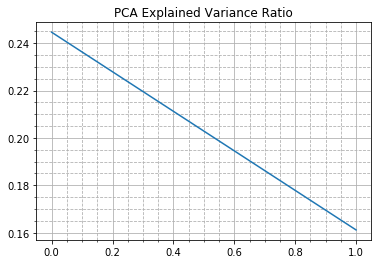

-----------------------------------------------------------------------------------------------------------------------
pca_comp:  (5188, 2)
y:  (5188, 1)


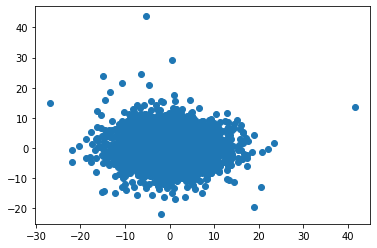

      principal_component_1  principal_component_2  target
0                  2.670374               1.504946       3
1                  2.734290              -4.452583       5
2                  2.140779              -9.317932       2
3                  3.720886               0.464374       5
4                  6.128821              -0.257498       3
...                     ...                    ...     ...
5183               1.638606               2.204960       5
5184              -4.338746               5.752922       4
5185              -2.246629               6.599859       4
5186               5.027574               3.541564       0
5187               4.068451              -5.141806       0

[5188 rows x 3 columns]


"\n\nzero_label = finalDf.loc[finalDf['target'] == 0]\nzero_label.pop('target')\n\none_label = finalDf.loc[finalDf['target'] == 1]\none_label.pop('target')\n\ntwo_label = finalDf.loc[finalDf['target'] == 2]\ntwo_label.pop('target')\n\nfig = plt.figure()\nax1 = fig.add_subplot(111)\n\nax1.scatter(zero_label.iloc[:,0],zero_label.iloc[:,1],c='r')\nax1.scatter(one_label.iloc[:,0],one_label.iloc[:,1],c='b')\nax1.scatter(two_label.iloc[:,0],two_label.iloc[:,1],c='g')\nplt.show()\n"

In [0]:

principalComponent = do_pca(data[0],2)

print("pca_comp: ",principalComponent.shape)
print("y: ",y.shape)
plt.scatter(principalComponent[:,0],principalComponent[:,1])
plt.show()

y = pd.DataFrame(data = y, columns=['target'])
principalDf = pd.DataFrame(data = principalComponent, columns = ['principal_component_1', 'principal_component_2'])
finalDf = pd.concat([principalDf, y], axis = 1)

print(finalDf)
'''

zero_label = finalDf.loc[finalDf['target'] == 0]
zero_label.pop('target')

one_label = finalDf.loc[finalDf['target'] == 1]
one_label.pop('target')

two_label = finalDf.loc[finalDf['target'] == 2]
two_label.pop('target')

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(zero_label.iloc[:,0],zero_label.iloc[:,1],c='r')
ax1.scatter(one_label.iloc[:,0],one_label.iloc[:,1],c='b')
ax1.scatter(two_label.iloc[:,0],two_label.iloc[:,1],c='g')
plt.show()
'''

-----------------------------------------------------------------------------------------------------------------------

initial shape of data:  (5188, 124)
Shape of data after PCA:  (5188, 51)
PCA explained varience ratio:  [0.26367633 0.16355787 0.13826054 0.07371073 0.04426266 0.03050999
 0.02614982 0.02025615 0.01810239 0.01323773 0.01279836 0.00974588
 0.00913423 0.00833288 0.00731779 0.00614679 0.00588407 0.00551245
 0.00535925 0.0051478  0.00443748 0.00432996 0.0041313  0.00380811
 0.00377902 0.00359471 0.00352073 0.00335118 0.003114   0.00294007
 0.00285198 0.00277749 0.00271748 0.00258504 0.00252591 0.00249356
 0.00243614 0.00230789 0.00228522 0.00217771 0.00212917 0.00209148
 0.00206108 0.00200031 0.00196296 0.00195348 0.00184375 0.00183624
 0.00180752 0.00179175 0.00176458]


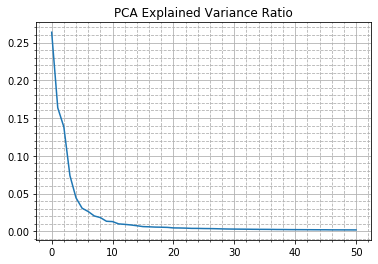

-----------------------------------------------------------------------------------------------------------------------
pca_comp:  (5188, 51)
y:  (5188, 1)


In [0]:
principalComponent = do_pca(data[7],0.95)

print("pca_comp: ",principalComponent.shape)
print("y: ",y.shape)



# RBF SVC

In [0]:
#linear_score = []
rbf_score = []
#poly_score = []
#sigmoid_score = []

for i in range(0,32):
  print("Time Stamp: ",i+1)
  principalComponent = do_pca(data[i],0.95)
  X_train, X_test, y_train, y_test = train_test_split(principalComponent, y, test_size=0.1)

  X_train=(X_train-X_train.mean())/X_train.std()
  X_test=(X_test-X_test.mean())/X_test.std()

  rbfsvmc = svm.SVC(kernel = 'rbf', gamma = 0.5)
  rbf_svmc = rbfsvmc.fit(X_train, y_train)
  rbf_y_pred = rbfsvmc.predict(X_test)
  rbf_score.append(rbfsvmc.score(X_test,y_test))
  print("Score :: SVM -> Kernel = rbf: ",rbf_score[i])

  #rbf_confusion_matrix = metrics.confusion_matrix(y_test,rbf_y_pred)
  #print("RBF Confusion Matrix: ")
  #print(rbf_confusion_matrix)
  #plt.show(sn.heatmap(rbf_confusion_matrix, annot=True))

'''
  linearsvmc = svm.SVC(kernel = 'linear')
  linear_svmc = linearsvmc.fit(X_train, y_train)
  linear_y_pred = linearsvmc.predict(X_test)
  linear_score.append(linearsvmc.score(X_test,y_test))
  print("Score :: SVM -> Kernel = linear: ",linear_score[i])
  #linear_confusion_matrix = metrics.confusion_matrix(y_test,linear_y_pred)
  #print("Linear Confusion Matrix: ")
  #print(linear_confusion_matrix)
  #plt.show(sn.heatmap(linear_confusion_matrix, annot=True))
'''

  
'''
  polysvmc = svm.SVC(kernel = 'poly', degree = 2)
  poly_svmc = polysvmc.fit(X_train, y_train)
  poly_y_pred = polysvmc.predict(X_test)
  poly_score.append(linearsvmc.score(X_test,y_test))
  print("Score :: SVM -> Kernel = poly: ",poly_score[i])
  #poly_confusion_matrix = metrics.confusion_matrix(y_test,poly_y_pred)
  #print("Poly Confusion Matrix: ")
  #print(poly_confusion_matrix)
  #plt.show(sn.heatmap(poly_confusion_matrix, annot=True))

  sigmoidsvmc = svm.SVC(kernel = 'sigmoid')
  sigmoid_svmc = sigmoidsvmc.fit(X_train, y_train)
  sigmoid_y_pred = sigmoidsvmc.predict(X_test)
  sigmoid_score.append(linearsvmc.score(X_test,y_test))
  print("Score :: SVM -> Kernel = sigmoid: ",sigmoid_score[i])
  #sigmoid_confusion_matrix = metrics.confusion_matrix(y_test,sigmoid_y_pred)
  #print("Sigmoid Confusion Matrix: ")
  #print(sigmoid_confusion_matrix)
  #plt.show(sn.heatmap(sigmoid_confusion_matrix, annot=True))
'''


Time Stamp:  1
Score :: SVM -> Kernel = rbf:  0.1599229287090559
Time Stamp:  2
Score :: SVM -> Kernel = rbf:  0.1464354527938343
Time Stamp:  3
Score :: SVM -> Kernel = rbf:  0.12716763005780346
Time Stamp:  4
Score :: SVM -> Kernel = rbf:  0.1579961464354528
Time Stamp:  5
Score :: SVM -> Kernel = rbf:  0.15221579961464354
Time Stamp:  6
Score :: SVM -> Kernel = rbf:  0.14258188824662812
Time Stamp:  7
Score :: SVM -> Kernel = rbf:  0.14258188824662812
Time Stamp:  8
Score :: SVM -> Kernel = rbf:  0.17148362235067438
Time Stamp:  9
Score :: SVM -> Kernel = rbf:  0.13102119460500963
Time Stamp:  10
Score :: SVM -> Kernel = rbf:  0.13872832369942195
Time Stamp:  11
Score :: SVM -> Kernel = rbf:  0.16570327552986513
Time Stamp:  12
Score :: SVM -> Kernel = rbf:  0.15414258188824662
Time Stamp:  13
Score :: SVM -> Kernel = rbf:  0.15414258188824662
Time Stamp:  14
Score :: SVM -> Kernel = rbf:  0.13872832369942195
Time Stamp:  15
Score :: SVM -> Kernel = rbf:  0.13102119460500963
Time St

'\n  polysvmc = svm.SVC(kernel = \'poly\', degree = 2)\n  poly_svmc = polysvmc.fit(X_train, y_train)\n  poly_y_pred = polysvmc.predict(X_test)\n  poly_score.append(linearsvmc.score(X_test,y_test))\n  print("Score :: SVM -> Kernel = poly: ",poly_score[i])\n  #poly_confusion_matrix = metrics.confusion_matrix(y_test,poly_y_pred)\n  #print("Poly Confusion Matrix: ")\n  #print(poly_confusion_matrix)\n  #plt.show(sn.heatmap(poly_confusion_matrix, annot=True))\n\n  sigmoidsvmc = svm.SVC(kernel = \'sigmoid\')\n  sigmoid_svmc = sigmoidsvmc.fit(X_train, y_train)\n  sigmoid_y_pred = sigmoidsvmc.predict(X_test)\n  sigmoid_score.append(linearsvmc.score(X_test,y_test))\n  print("Score :: SVM -> Kernel = sigmoid: ",sigmoid_score[i])\n  #sigmoid_confusion_matrix = metrics.confusion_matrix(y_test,sigmoid_y_pred)\n  #print("Sigmoid Confusion Matrix: ")\n  #print(sigmoid_confusion_matrix)\n  #plt.show(sn.heatmap(sigmoid_confusion_matrix, annot=True))\n'

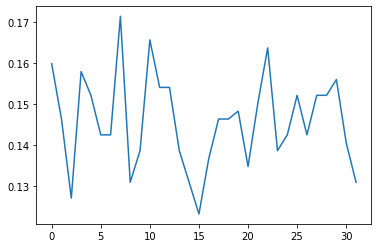

Mean Score RBF:  0.14601396917148363


In [0]:
plt.plot(rbf_score)
plt.show()
print("Mean Score RBF: ", np.mean(rbf_score))
